# 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from datetime import datetime, date

2024-10-03 20:19:59.394593: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-03 20:19:59.399388: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-03 20:19:59.414100: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-03 20:19:59.438174: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-03 20:19:59.445088: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-03 20:20:00.773611: W tensorflow/compiler/tf2tensorrt/utils/p

# 2. Data overview

In [2]:
data = pd.read_csv('/home/hoangbaoan1901/Development/predictive-analysis/Homeworks/week-3-btl/datasets/jrfm-2156907.csv')
data.isna().sum()

Date                             0
BTC_Open                         0
BTC_High                         0
BTC_Low                          0
BTC_Close                        0
BTC_Volume                       0
Active Addr Cnt                  0
Xfer Cnt                         0
Mean Tx Size (native units)      0
Total Fees (USD)                 0
Mean Hash Rate                   0
Difficulty                       0
Mean Block Size (in bytes)       0
Sum Block Weight                 0
LTC                              0
XRP                              0
DASH                             0
DOGE                             0
ETH                            129
Gold                           705
Silver                         377
Copper                         748
Oil                            711
Treasury Yield 10 Years        796
S&P500                         793
DJI                            793
CBOE                           794
NASDAQ                         794
JP225               

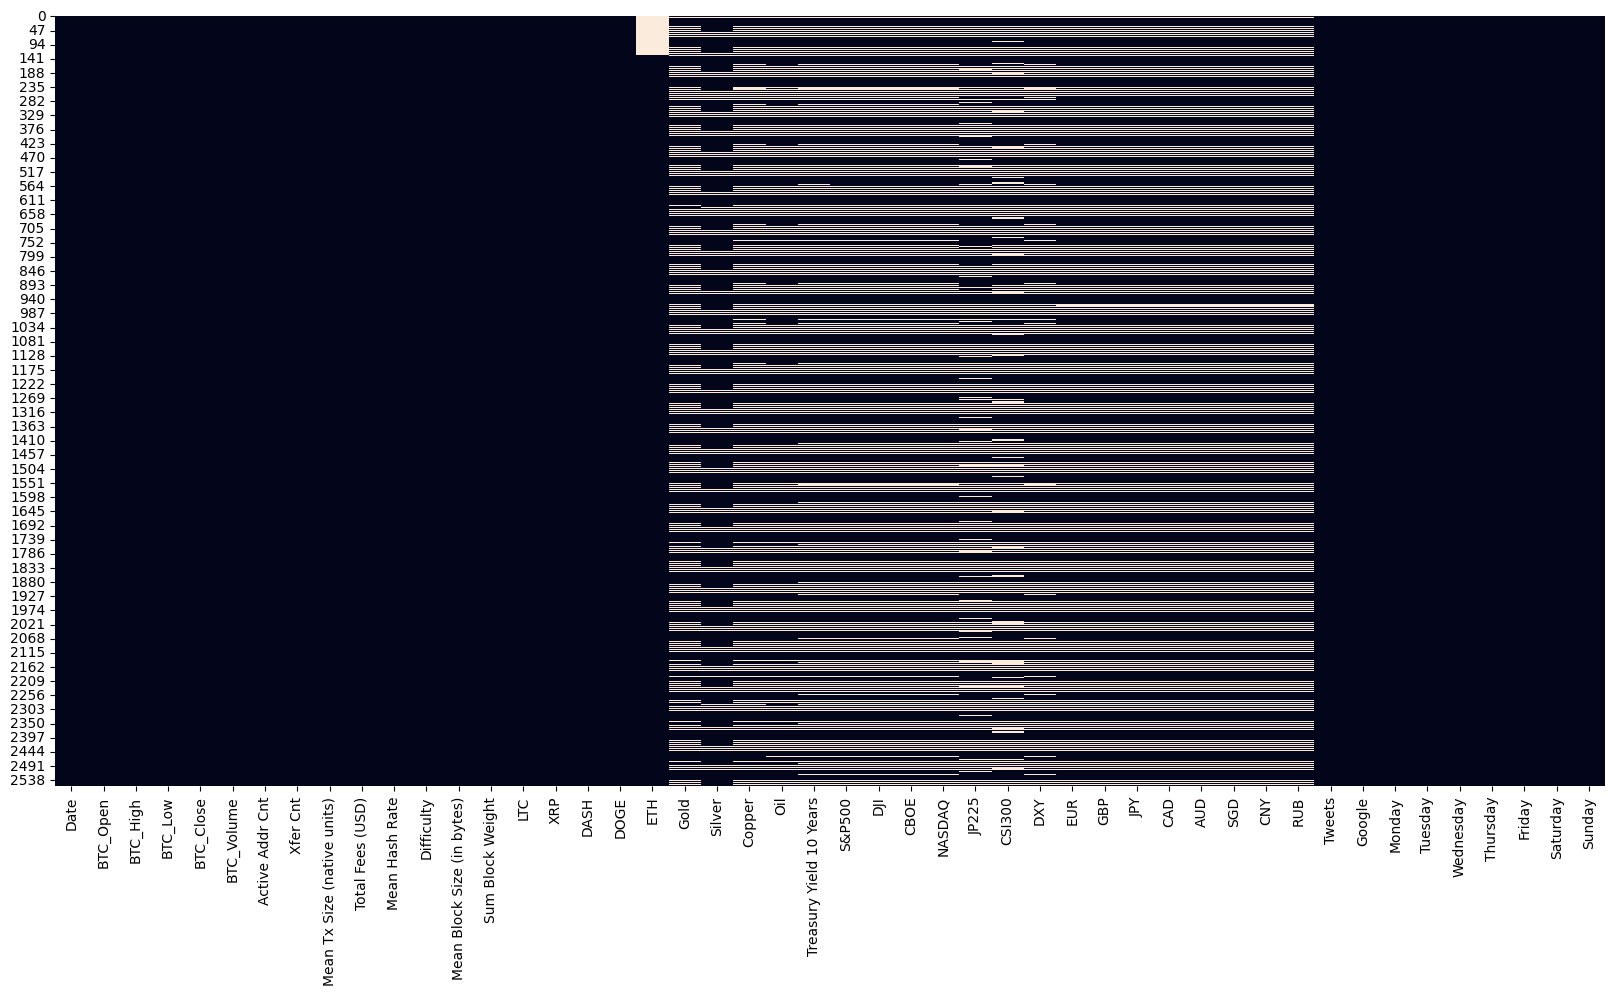

In [3]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.isnull(), cbar=False, linecolor='white')
plt.show()

- Gaps between values have quite similar size, this could be since the market often close in weekends and holidays or other problems that halt the trading flow -> We can use forward fill to imputates the data (filling with last observed value)

In [4]:
data.shape

(2559, 48)

In [5]:
data.head()

,Date,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Volume,Active Addr Cnt,Xfer Cnt,Mean Tx Size (native units),Total Fees (USD),...,RUB,Tweets,Google,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,2015/3/31,247.453995,248.729996,242.738998,244.223999,22672000.0,266605,289277,2.598129,3975.683960,...,57.525002,35388,82.0,0,1,0,0,0,0,0
1,2015/4/1,244.223007,247.541000,241.160004,247.272003,22877200.0,274206,294956,3.323276,4223.147406,...,58.152000,34237,84.0,0,0,1,0,0,0,0
2,2015/4/2,247.089005,254.460999,245.416000,253.005005,26272600.0,249771,266464,2.531111,3902.571816,...,57.553001,29264,74.0,0,0,0,1,0,0,0
3,2015/4/3,253.074005,256.042999,251.878998,254.322006,23146600.0,240801,259265,2.636358,3905.932009,...,56.550999,30317,76.0,0,0,0,0,1,0,0
4,2015/4/4,254.291000,255.257996,251.100006,253.697006,12493500.0,243687,273872,1.395114,3378.135444,...,NaN,37885,73.0,0,0,0,0,0,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2559 entries, 0 to 2558
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         2559 non-null   object 
 1   BTC_Open                     2559 non-null   float64
 2   BTC_High                     2559 non-null   float64
 3   BTC_Low                      2559 non-null   float64
 4   BTC_Close                    2559 non-null   float64
 5   BTC_Volume                   2559 non-null   float64
 6   Active Addr Cnt              2559 non-null   int64  
 7   Xfer Cnt                     2559 non-null   int64  
 8   Mean Tx Size (native units)  2559 non-null   float64
 9   Total Fees (USD)             2559 non-null   float64
 10  Mean Hash Rate               2559 non-null   float64
 11  Difficulty                   2559 non-null   float64
 12  Mean Block Size (in bytes)   2559 non-null   float64
 13  Sum Block Weight  

# 3. Data preprocessing

In [7]:
# Using forward filling to fill missing values
# Missing values is due to closed market on weekends & holidays
# Note that ETH is created on 30 July 2015, so we will remove all data before that date
data = data.loc[:2558,:]
data = data.ffill()
for index in data.index:
	data.loc[index, "Date"] = datetime.strptime(str(data.loc[index, "Date"])[:10], '%Y/%m/%d').date()

data = data[data['Date'] >= date(2015, 8, 7)]


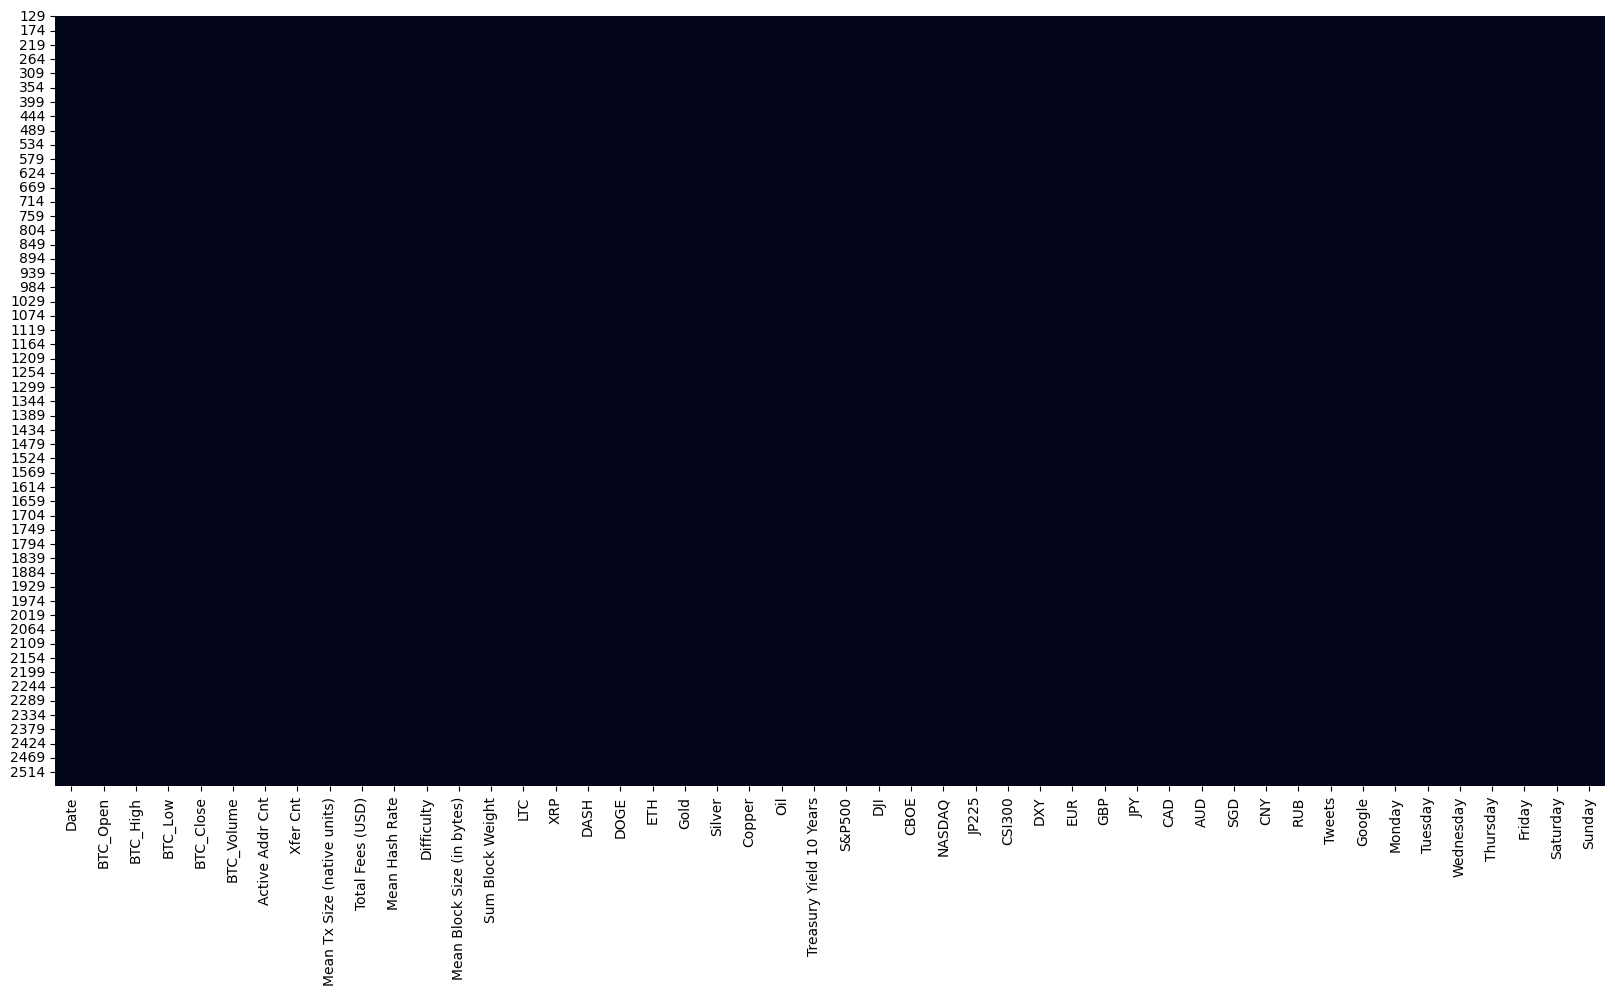

In [8]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.isnull(), cbar=False, linecolor='white')
plt.show()

In [9]:
data.shape


(2430, 48)

In [10]:
data.isna().sum()

Date                           0
BTC_Open                       0
BTC_High                       0
BTC_Low                        0
BTC_Close                      0
BTC_Volume                     0
Active Addr Cnt                0
Xfer Cnt                       0
Mean Tx Size (native units)    0
Total Fees (USD)               0
Mean Hash Rate                 0
Difficulty                     0
Mean Block Size (in bytes)     0
Sum Block Weight               0
LTC                            0
XRP                            0
DASH                           0
DOGE                           0
ETH                            0
Gold                           0
Silver                         0
Copper                         0
Oil                            0
Treasury Yield 10 Years        0
S&P500                         0
DJI                            0
CBOE                           0
NASDAQ                         0
JP225                          0
CSI300                         0
DXY       

In [11]:
data.to_csv('/home/hoangbaoan1901/Development/predictive-analysis/Homeworks/week-3-btl/datasets/jrfm-2156907-cleaned.csv', index=False)

In [12]:
# Split data['Date'] into data['Day'], data['Month'], and data['Year']
data['Day'] = data['Date'].apply(lambda x: x.day)
data['Month'] = data['Date'].apply(lambda x: x.month)
data['Year'] = data['Date'].apply(lambda x: x.year)

In [13]:
data.to_csv('/home/hoangbaoan1901/Development/predictive-analysis/Homeworks/week-3-btl/datasets/jrfm-2156907-cleaned_encoded-date.csv', index=False)

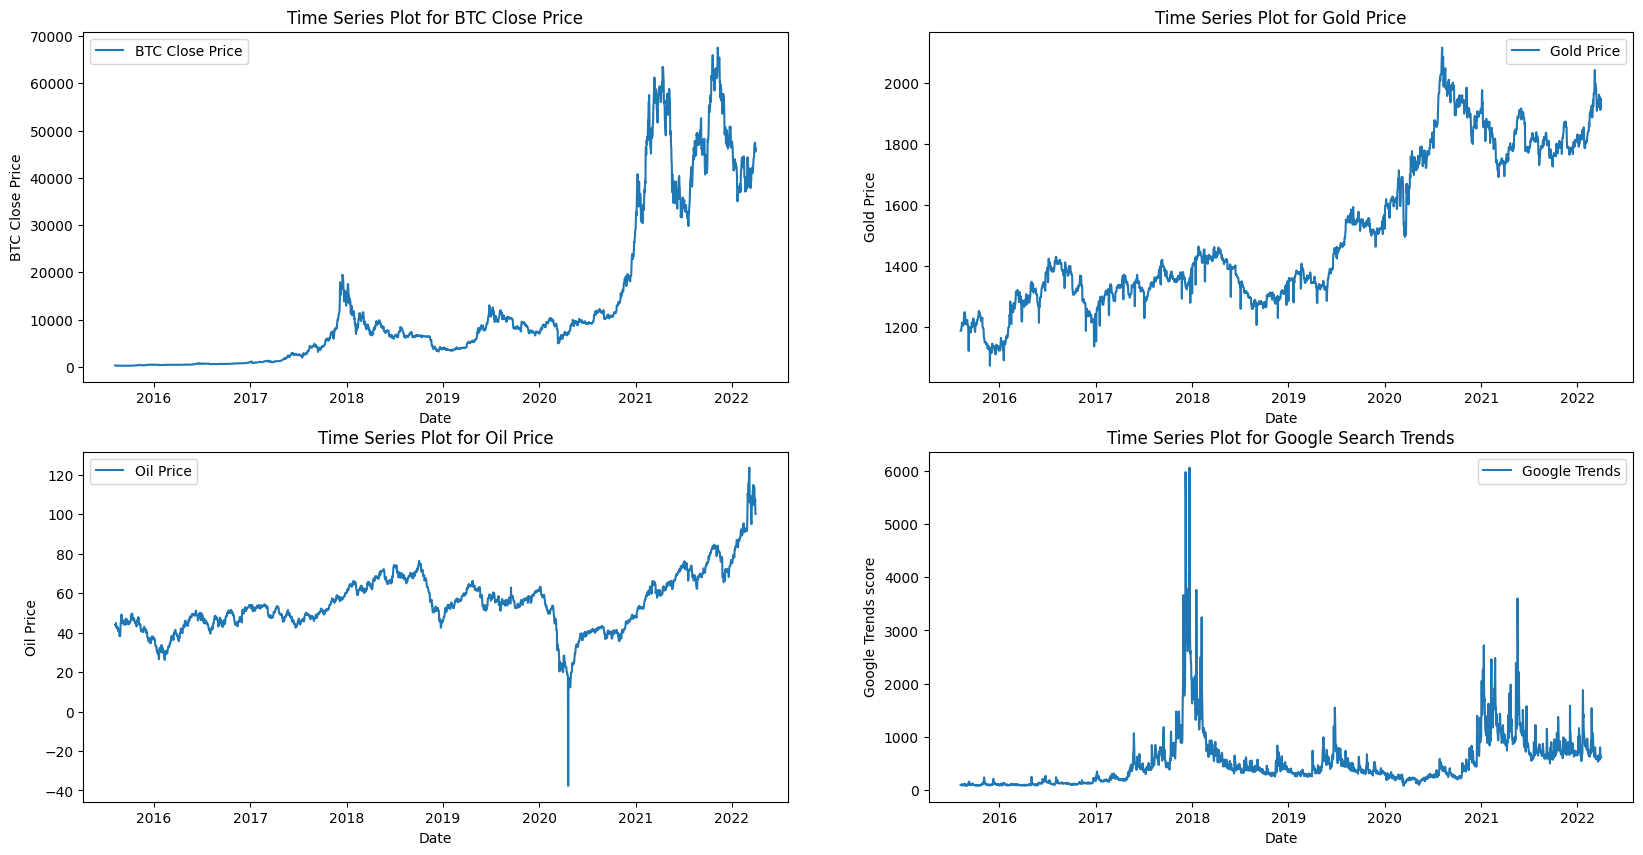

In [14]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.plot(data['Date'], data['BTC_Close'], label='BTC Close Price')
plt.xlabel('Date')
plt.ylabel('BTC Close Price')
plt.title('Time Series Plot for BTC Close Price')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(data['Date'], data['Gold'], label='Gold Price')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Time Series Plot for Gold Price')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(data['Date'], data['Oil'], label='Oil Price')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Time Series Plot for Oil Price')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(data['Date'], data['Google'], label='Google Trends')
plt.xlabel('Date')
plt.ylabel('Google Trends score')
plt.title('Time Series Plot for Google Search Trends')
plt.legend()

plt.show()

In [15]:
# Count the number of negative values in each column except 'Date'
negative_values = (data.select_dtypes(include=[np.number]) < 0).sum()
print(negative_values)

BTC_Open                       0
BTC_High                       0
BTC_Low                        0
BTC_Close                      0
BTC_Volume                     0
Active Addr Cnt                0
Xfer Cnt                       0
Mean Tx Size (native units)    0
Total Fees (USD)               0
Mean Hash Rate                 0
Difficulty                     0
Mean Block Size (in bytes)     0
Sum Block Weight               0
LTC                            0
XRP                            0
DASH                           0
DOGE                           0
ETH                            0
Gold                           0
Silver                         0
Copper                         0
Oil                            1
Treasury Yield 10 Years        0
S&P500                         0
DJI                            0
CBOE                           0
NASDAQ                         0
JP225                          0
CSI300                         0
DXY                            0
EUR       

In [16]:
negative_oil_rows = data[data['Oil'] < 0]
print(negative_oil_rows['Date'])

1847    2020-04-20
Name: Date, dtype: object


- This is acutally true because of the Corona Virus effects